In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
sys.path.append('../..')

import Helpers
from Helpers.NeuralNetwork import NeuralNetwork

from Data import DatasetClasses

from Layers.Flatten import Flatten
from Layers.KNNLayer import KNNLayer
from Layers.Initializers import He, Constant

from Optimization.Optimizers import Sgd

### Dataset


dataset Informations:
--------------------------------------------------
Training samples: 1168
Sample shape: (1, 8, 8)
Number of classes: 10
Test samples: 360
Dataset size in memory: 0.75 MB


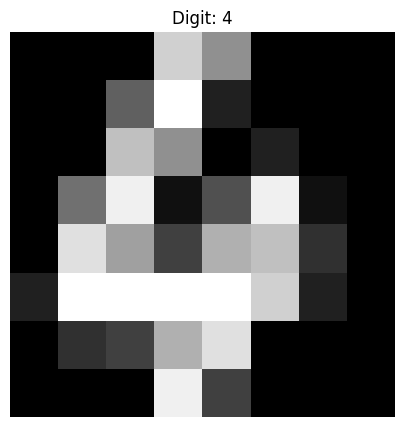

In [3]:
batch_size = 100
digitdata = DatasetClasses.DigitData(batch_size)
digitdata.print_dataset_info()

### Architecture: k-NN Classifier

In [4]:
def build_knn_classifier(k=5, distance_metric='euclidean', num_classes=10):
    """
    Build a k-NN classifier using the neural network architecture
    """
    # Create a dummy optimizer (not used for k-NN)
    optimizer = Sgd(0.01)
    weights_initializer = He()
    bias_initializer = Constant(0.0)
    
    # Initialize network
    net = NeuralNetwork(optimizer, weights_initializer, bias_initializer)
    
    # Add layers
    net.append_layer(Flatten())  # Flatten input to vector
    net.append_layer(KNNLayer(k=k, distance_metric=distance_metric, num_classes=num_classes))
    
    return net

### Train and Test k-NN Model

Created k-NN model with k=5


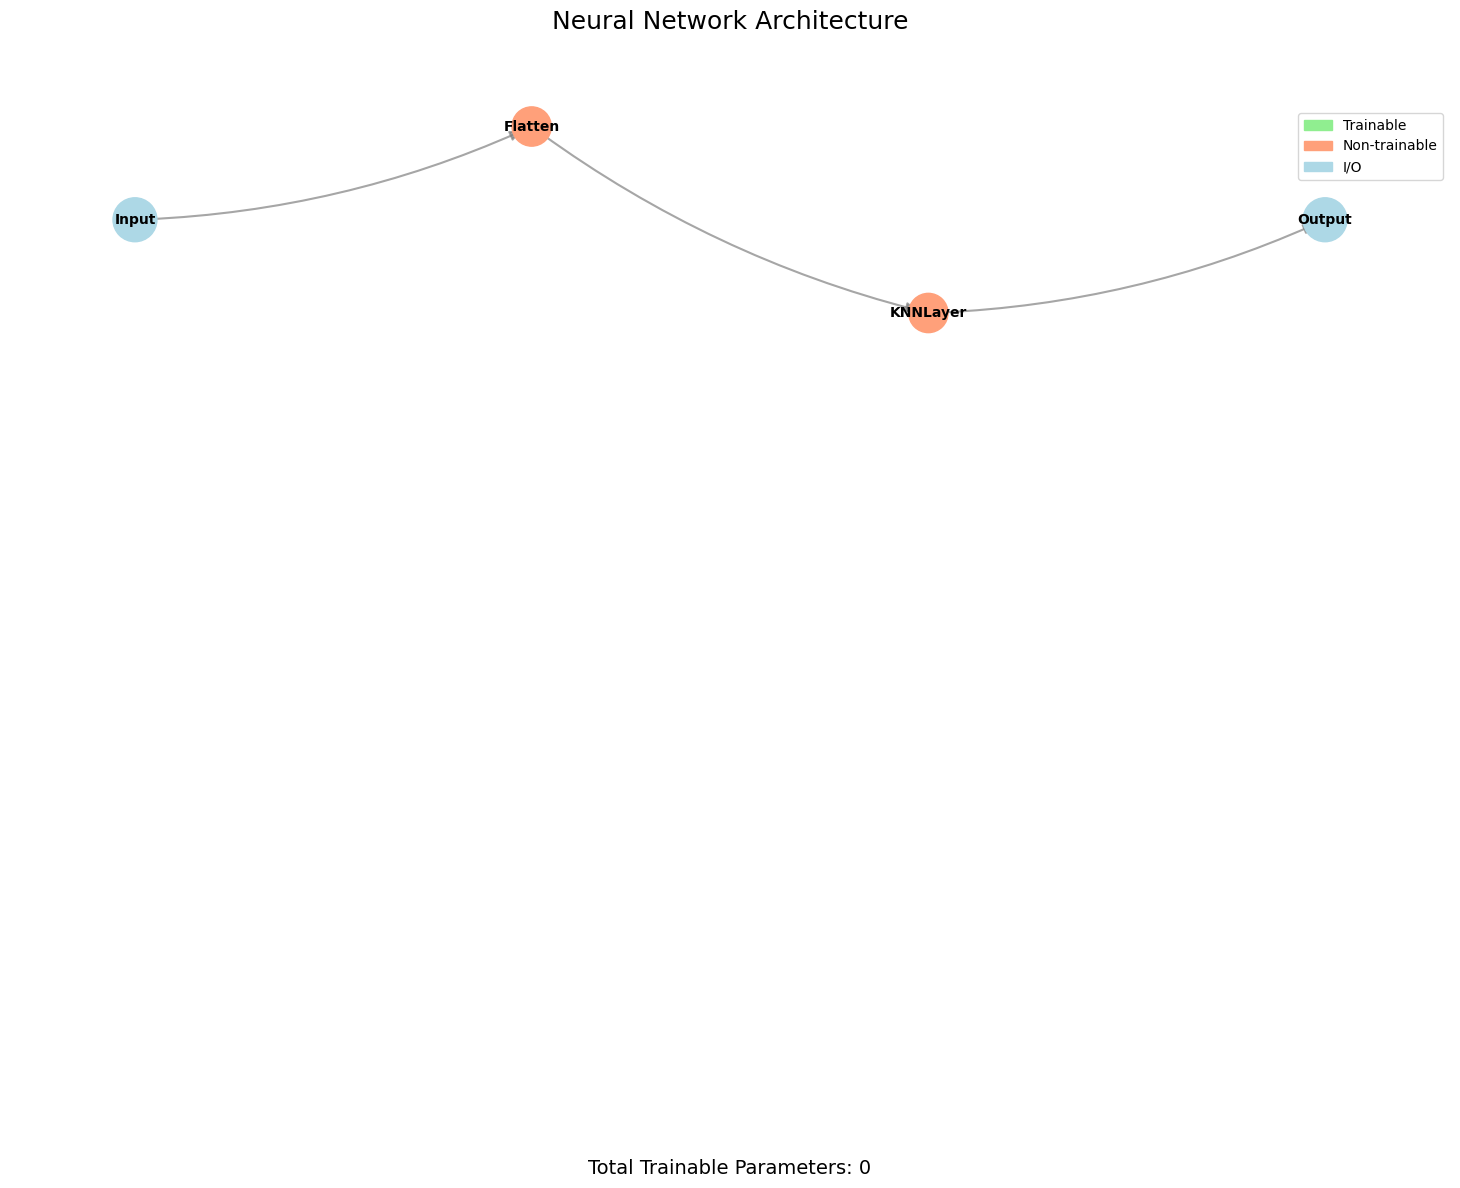

Stored 1000 training samples for k-NN classification


In [5]:
# Build k-NN classifier
k = 5  # Number of neighbors
net = build_knn_classifier(k=k, distance_metric='euclidean', num_classes=10)
net.data_layer = digitdata
print(f"Created k-NN model with k={k}")

# Visualize the network
fig = net.plot()

# Get training data and store it in the k-NN layer
train_data, train_labels_onehot = digitdata.get_train_set()
# Convert one-hot labels to integer labels
train_labels = np.argmax(train_labels_onehot, axis=1)

knn_layer = net.layers[1]  # The k-NN layer

# Use a subset of training data for faster computation
subset_size = 1000  # Use 1000 training samples
indices = np.random.choice(len(train_data), subset_size, replace=False)
train_subset = train_data[indices].reshape(subset_size, -1)
labels_subset = train_labels[indices]

knn_layer.store_training_data(train_subset, labels_subset)

### Evaluate on Test Set

In [6]:
# Get the test set
test_data, test_labels_onehot = net.data_layer.get_test_set()
# Convert one-hot labels to integer labels
test_labels = np.argmax(test_labels_onehot, axis=1)

# Test the network on the test set
results = net.test(test_data)
predicted_classes = np.argmax(results, axis=1)
accuracy = np.mean(predicted_classes == test_labels)

print(f'\nOn the digits dataset, k-NN (k={k}) achieves an accuracy of: {accuracy * 100:.2f}%')


On the digits dataset, k-NN (k=5) achieves an accuracy of: 97.50%


### Analysis with Different k Values

Testing different k values...

Testing k=1...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9900
Testing k=3...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9733
Testing k=5...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9733
Testing k=7...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9733
Testing k=9...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9700
Testing k=11...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9633
Testing k=15...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9700


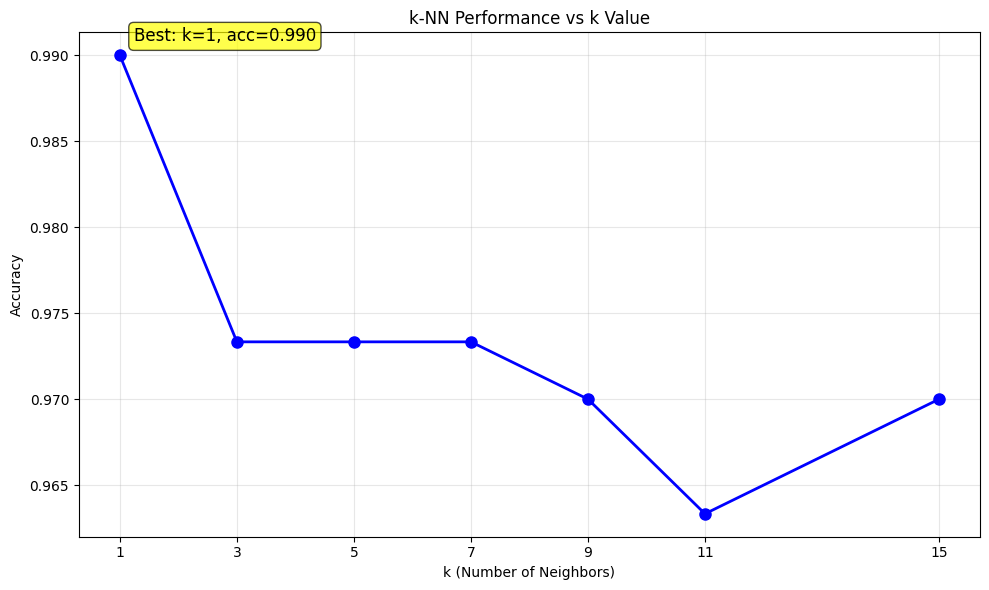


Best k value: 1 with accuracy: 0.9900


In [7]:
# Test different values of k
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []

print("Testing different k values...\n")

for k in k_values:
    print(f"Testing k={k}...")
    
    # Build k-NN classifier
    net = build_knn_classifier(k=k, distance_metric='euclidean', num_classes=10)
    net.data_layer = digitdata
    
    # Store training data in the k-NN layer
    knn_layer = net.layers[1]
    knn_layer.store_training_data(train_subset, labels_subset)
    
    # Test on a subset for faster computation
    test_subset_size = 300
    test_indices = np.random.choice(len(test_data), test_subset_size, replace=False)
    test_subset = test_data[test_indices]
    test_labels_subset = test_labels[test_indices]
    
    # Predict
    predictions = net.test(test_subset)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Calculate accuracy
    accuracy = np.mean(predicted_classes == test_labels_subset)
    accuracies.append(accuracy)
    
    print(f"  Accuracy: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('k-NN Performance vs k Value')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Find and annotate best k
best_idx = np.argmax(accuracies)
best_k = k_values[best_idx]
best_acc = accuracies[best_idx]
plt.annotate(f'Best: k={best_k}, acc={best_acc:.3f}', 
            xy=(best_k, best_acc), xytext=(10, 10),
            textcoords='offset points', fontsize=12,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print(f"\nBest k value: {best_k} with accuracy: {best_acc:.4f}")

### Analysis with Different Distance Metrics

Testing different distance metrics...

Testing euclidean distance with k=3...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9800
Testing euclidean distance with k=5...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9800
Testing euclidean distance with k=7...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9950
Testing euclidean distance with k=9...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9750

Testing manhattan distance with k=3...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9750
Testing manhattan distance with k=5...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9750
Testing manhattan distance with k=7...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9600
Testing manhattan distance with k=9...
Stored 1000 training samples for k-NN classification
  Accuracy: 0.9750



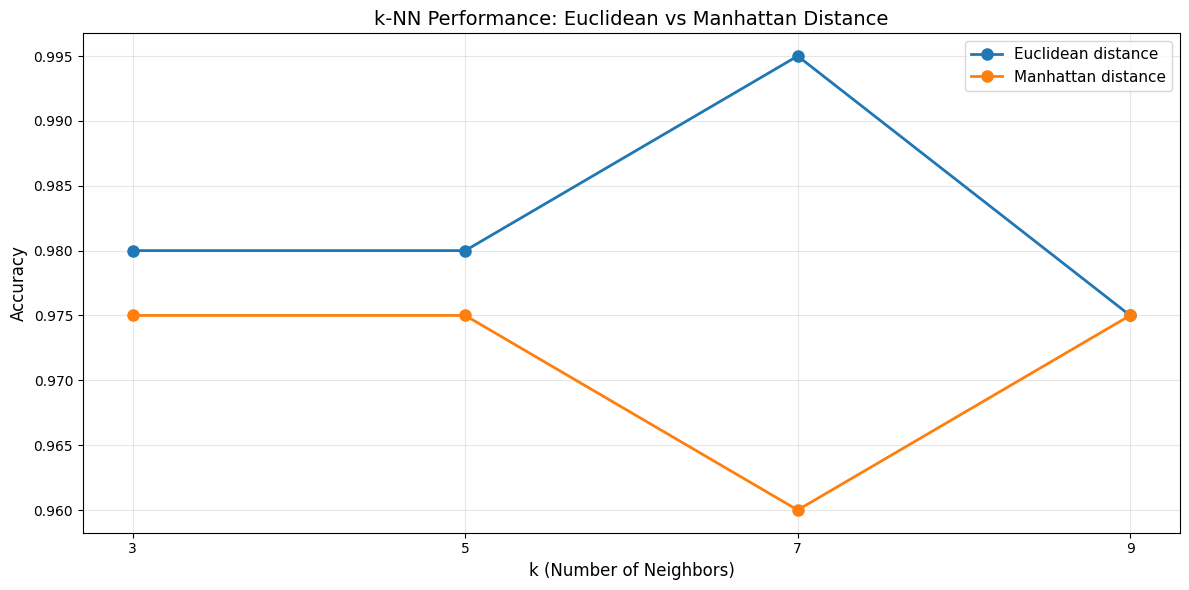

In [8]:
# Test different distance metrics
distance_metrics = ['euclidean', 'manhattan']
distance_results = {}

print("Testing different distance metrics...\n")

for distance_metric in distance_metrics:
    distance_results[distance_metric] = {'k_values': [], 'accuracies': []}
    
    for k in [3, 5, 7, 9]:
        print(f"Testing {distance_metric} distance with k={k}...")
        
        # Build k-NN classifier
        net = build_knn_classifier(k=k, distance_metric=distance_metric, num_classes=10)
        
        # Store training data in the k-NN layer
        knn_layer = net.layers[1]
        knn_layer.store_training_data(train_subset, labels_subset)
        
        # Test on a subset for faster computation
        test_subset_size = 200
        test_indices = np.random.choice(len(test_data), test_subset_size, replace=False)
        test_subset = test_data[test_indices]
        test_labels_subset = test_labels[test_indices]
        
        # Predict
        predictions = net.test(test_subset)
        predicted_classes = np.argmax(predictions, axis=1)
        
        # Calculate accuracy
        accuracy = np.mean(predicted_classes == test_labels_subset)
        
        distance_results[distance_metric]['k_values'].append(k)
        distance_results[distance_metric]['accuracies'].append(accuracy)
        
        print(f"  Accuracy: {accuracy:.4f}")
    
    print()

# Plot comparison
plt.figure(figsize=(12, 6))

for distance_metric in distance_metrics:
    plt.plot(distance_results[distance_metric]['k_values'], 
             distance_results[distance_metric]['accuracies'], 
             marker='o', linewidth=2, markersize=8,
             label=f'{distance_metric.capitalize()} distance')

plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('k-NN Performance: Euclidean vs Manhattan Distance', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks([3, 5, 7, 9])

plt.tight_layout()
plt.show()

### Visualize Some Predictions

Stored 1000 training samples for k-NN classification


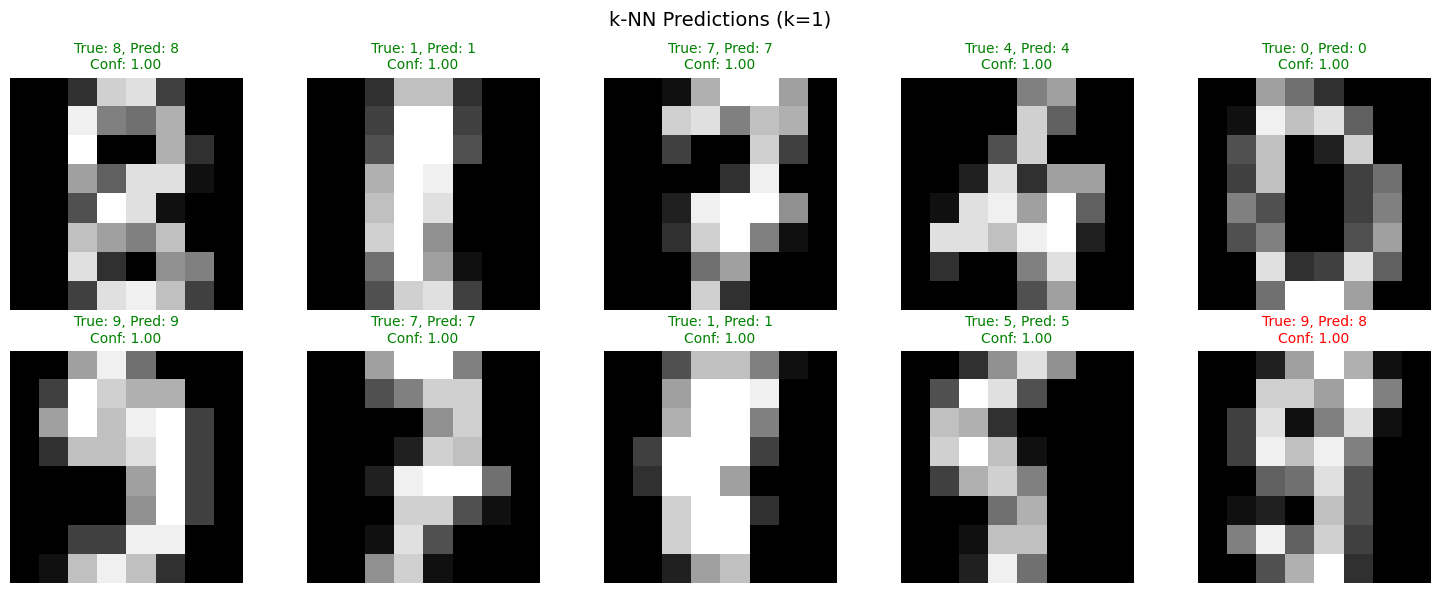

In [9]:
# Use the best k for final predictions
final_net = build_knn_classifier(k=best_k, distance_metric='euclidean', num_classes=10)
final_net.data_layer = digitdata
knn_layer = final_net.layers[1]
knn_layer.store_training_data(train_subset, labels_subset)

# Get some test samples for visualization
n_samples = 10
sample_indices = np.random.choice(len(test_data), n_samples, replace=False)
sample_data = test_data[sample_indices]
sample_labels = test_labels[sample_indices]

# Make predictions
sample_predictions = final_net.test(sample_data)
sample_predicted_classes = np.argmax(sample_predictions, axis=1)

# Visualize results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(n_samples):
    row, col = i // 5, i % 5
    
    # Show image
    axes[row, col].imshow(sample_data[i].reshape(8, 8), cmap='gray')
    
    # Set title with true and predicted labels
    true_label = int(sample_labels[i])
    pred_label = sample_predicted_classes[i]
    confidence = sample_predictions[i, pred_label]
    
    color = 'green' if true_label == pred_label else 'red'
    axes[row, col].set_title(f'True: {true_label}, Pred: {pred_label}\nConf: {confidence:.2f}', 
                            color=color, fontsize=10)
    axes[row, col].axis('off')

plt.suptitle(f'k-NN Predictions (k={best_k})', fontsize=14)
plt.tight_layout()
plt.show()

### Error Analysis

Number of misclassified samples: 5 out of 360
Error rate: 1.39%


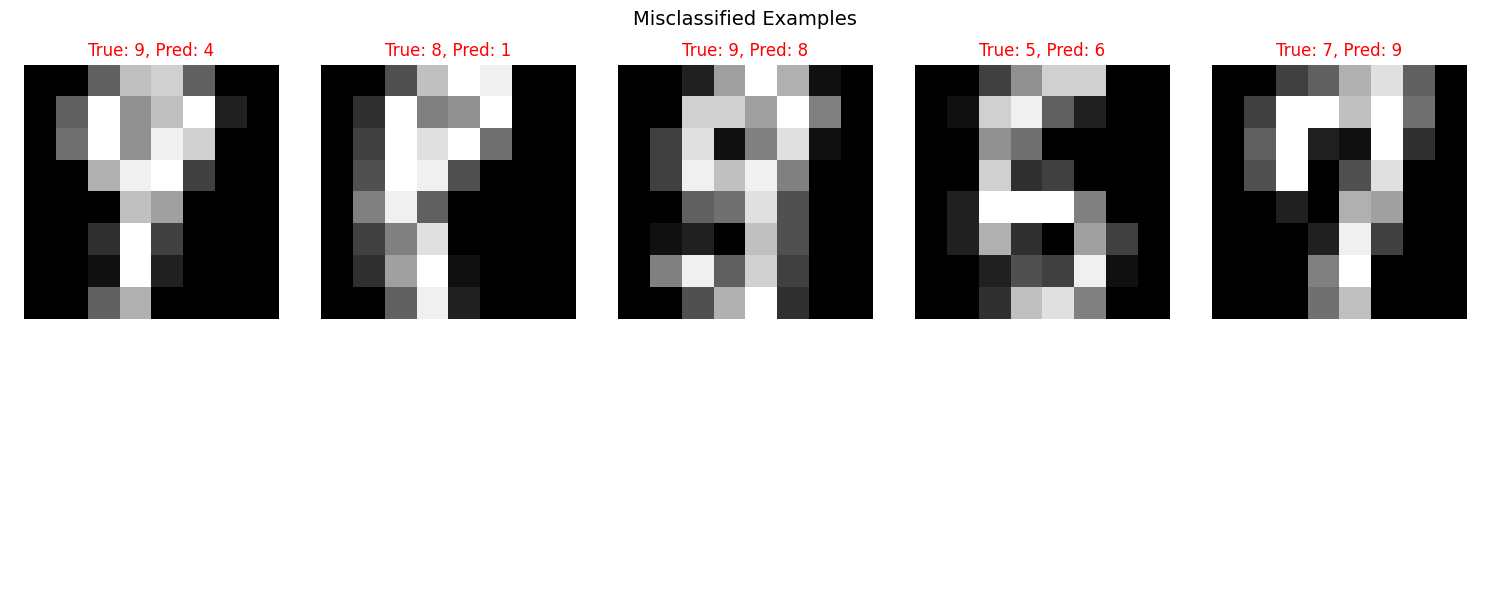

In [10]:
# Find misclassified samples
final_predictions = final_net.test(test_data)
final_predicted_classes = np.argmax(final_predictions, axis=1)
misclassified_indices = np.where(final_predicted_classes != test_labels)[0]

print(f"Number of misclassified samples: {len(misclassified_indices)} out of {len(test_labels)}")
print(f"Error rate: {len(misclassified_indices) / len(test_labels) * 100:.2f}%")

# Show some misclassified examples
n_examples = min(10, len(misclassified_indices))
if n_examples > 0:
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    
    for i in range(n_examples):
        idx = misclassified_indices[i]
        row, col = i // 5, i % 5
        
        axes[row, col].imshow(test_data[idx].reshape(8, 8), cmap='gray')
        axes[row, col].set_title(f'True: {int(test_labels[idx])}, Pred: {final_predicted_classes[idx]}', 
                                color='red')
        axes[row, col].axis('off')
    
    # Hide empty subplots
    for i in range(n_examples, 10):
        row, col = i // 5, i % 5
        axes[row, col].axis('off')
    
    plt.suptitle('Misclassified Examples', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified examples to show!")

### Computational Complexity Analysis

Analyzing computational complexity...

Testing with 100 training samples...
Stored 100 training samples for k-NN classification
  Time: 0.0126 seconds
  Accuracy: 0.9200

Testing with 300 training samples...
Stored 300 training samples for k-NN classification
  Time: 0.0186 seconds
  Accuracy: 0.9900

Testing with 500 training samples...
Stored 500 training samples for k-NN classification
  Time: 0.0243 seconds
  Accuracy: 0.9800

Testing with 800 training samples...
Stored 800 training samples for k-NN classification
  Time: 0.0207 seconds
  Accuracy: 1.0000

Testing with 1000 training samples...
Stored 1000 training samples for k-NN classification
  Time: 0.0230 seconds
  Accuracy: 0.9600



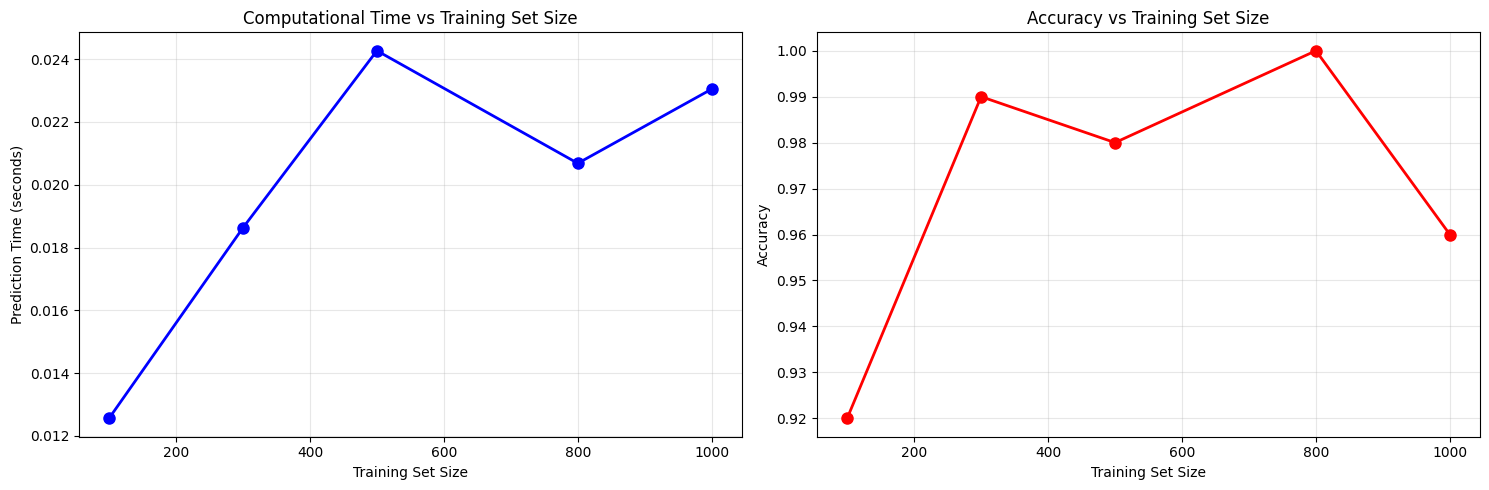

Computational complexity analysis:
Training sizes: [100, 300, 500, 800, 1000]
Times (seconds): ['0.0126', '0.0186', '0.0243', '0.0207', '0.0230']
Accuracies: ['0.9200', '0.9900', '0.9800', '1.0000', '0.9600']


In [11]:
# Analyze computational time vs training set size
training_sizes = [100, 300, 500, 800, 1000]
computation_times = []
accuracies_by_size = []

print("Analyzing computational complexity...\n")

for size in training_sizes:
    print(f"Testing with {size} training samples...")
    
    # Create k-NN with best parameters
    net = build_knn_classifier(k=best_k, distance_metric='euclidean', num_classes=10)
    knn_layer = net.layers[1]
    
    # Use subset of training data
    indices = np.random.choice(len(train_data), size, replace=False)
    train_subset_size = train_data[indices].reshape(size, -1)
    labels_subset_size = train_labels[indices]
    knn_layer.store_training_data(train_subset_size, labels_subset_size)
    
    # Test on subset of test data
    test_subset_size = 100
    test_indices = np.random.choice(len(test_data), test_subset_size, replace=False)
    test_subset = test_data[test_indices]
    test_labels_subset = test_labels[test_indices]
    
    # Measure prediction time
    start_time = time.time()
    predictions = net.test(test_subset)
    end_time = time.time()
    
    computation_time = end_time - start_time
    computation_times.append(computation_time)
    
    # Calculate accuracy
    predicted_classes = np.argmax(predictions, axis=1)
    accuracy = np.mean(predicted_classes == test_labels_subset)
    accuracies_by_size.append(accuracy)
    
    print(f"  Time: {computation_time:.4f} seconds")
    print(f"  Accuracy: {accuracy:.4f}")
    print()

# Plot computational complexity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Time vs training size
ax1.plot(training_sizes, computation_times, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Prediction Time (seconds)')
ax1.set_title('Computational Time vs Training Set Size')
ax1.grid(True, alpha=0.3)

# Accuracy vs training size
ax2.plot(training_sizes, accuracies_by_size, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs Training Set Size')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Computational complexity analysis:")
print(f"Training sizes: {training_sizes}")
print(f"Times (seconds): {[f'{t:.4f}' for t in computation_times]}")
print(f"Accuracies: {[f'{a:.4f}' for a in accuracies_by_size]}")

### Same with CIFAR


dataset Informations:
--------------------------------------------------
Training samples: 39000
Sample shape: (3, 32, 32)
Number of classes: 10
Test samples: 12000
Dataset size in memory: 597.66 MB


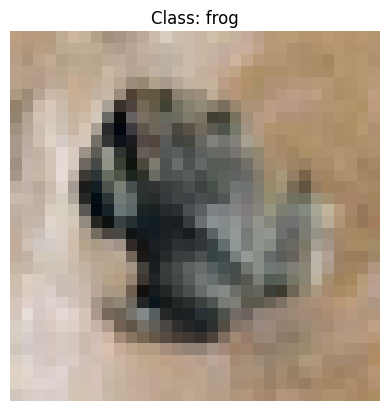

Created k-NN model for CIFAR
Stored 500 training samples for k-NN classification

On the CIFAR dataset, k-NN achieves an accuracy of: 23.50%


In [12]:
# Test on CIFAR dataset
cifar = DatasetClasses.CifarData(100)
cifar.print_dataset_info()

# Build k-NN for CIFAR
cifar_net = build_knn_classifier(k=5, distance_metric='euclidean', num_classes=10)
cifar_net.data_layer = cifar
print("Created k-NN model for CIFAR")

# Get CIFAR training data
cifar_train_data, cifar_train_labels_onehot = cifar.get_train_set()
cifar_train_labels = np.argmax(cifar_train_labels_onehot, axis=1)
cifar_knn_layer = cifar_net.layers[1]

# Use smaller subset for CIFAR (higher dimensional)
cifar_subset_size = 500
cifar_indices = np.random.choice(len(cifar_train_data), cifar_subset_size, replace=False)
cifar_train_subset = cifar_train_data[cifar_indices].reshape(cifar_subset_size, -1)
cifar_labels_subset = cifar_train_labels[cifar_indices]

cifar_knn_layer.store_training_data(cifar_train_subset, cifar_labels_subset)

# Test on CIFAR test set (subset)
cifar_test_data, cifar_test_labels_onehot = cifar.get_test_set()
cifar_test_labels = np.argmax(cifar_test_labels_onehot, axis=1)
cifar_test_subset_size = 200
cifar_test_indices = np.random.choice(len(cifar_test_data), cifar_test_subset_size, replace=False)
cifar_test_subset = cifar_test_data[cifar_test_indices]
cifar_test_labels_subset = cifar_test_labels[cifar_test_indices]

# Test the network
cifar_results = cifar_net.test(cifar_test_subset)
cifar_predicted_classes = np.argmax(cifar_results, axis=1)
cifar_accuracy = np.mean(cifar_predicted_classes == cifar_test_labels_subset)

print(f'\nOn the CIFAR dataset, k-NN achieves an accuracy of: {cifar_accuracy * 100:.2f}%')